In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt
from gpitch.audio import Audio
import gpitch

In [3]:
plt.rcParams['figure.figsize'] = (14, 3)
gpitch.init_settings();

In [4]:
path = "/import/c4dm-04/alvarado/datasets/ss_amt/training_data/"
filename = "011PFNOM_M60_train.wav"
d = Audio(path=path, filename=filename, scaled=False)

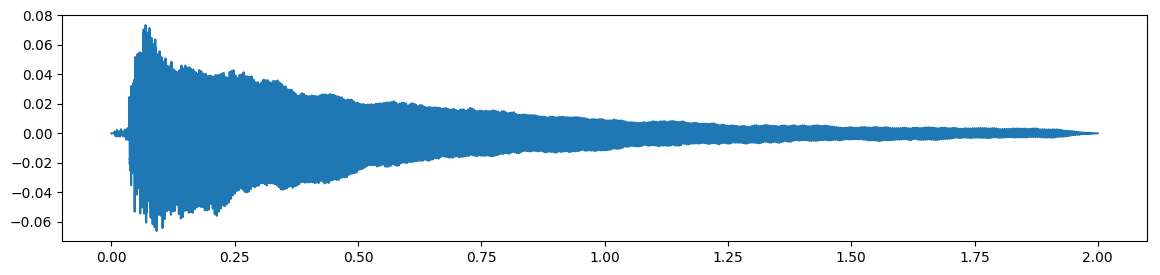

In [5]:
plt.plot(d.x, d.y);

In [6]:
rsize = 1600
r = gpitch.samplecov.autocorr(x=d.y, size=rsize)[0]

In [7]:
params, init_k, learned_k = gpitch.kernelfit.fit(kern=r, audio=d.y, file_name=d.name, max_par=25, fs=d.fs)

In [8]:
params

[0.2275667670368669,
 array([  2.45900600e-04,   8.57935567e-01,   3.41429336e-02,
          4.86543782e-03,   1.64499680e-02,   3.14764431e-02,
          2.36673112e-03,   4.27088979e-03,   3.18785434e-03,
          3.79318631e-04,   4.07367425e-04,   1.07015831e-03,
          1.44184090e-03,   1.06972868e-04,   1.68795402e-04,
          6.75348244e-05,   3.85927409e-04,   3.20625941e-05,
          4.46521845e-05,   2.41491227e-05,   3.15786609e-05,
          3.52345566e-05,   3.45214708e-05,   3.97869326e-05,
          2.23797168e-05]),
 array([   36.48024871,   246.30029527,   494.06092305,   741.05161377,
          988.91043967,  1237.8699773 ,  1487.76448756,  1739.61149258,
         1993.17657018,  2247.14356377,  2504.16270273,  2763.2100703 ,
         3023.85837514,  3288.20624057,  3558.221295  ,  3826.23942728,
         4100.76280321,  4376.27355742,  4659.29121692,  4941.30881643,
         5231.32694026,  5525.84536934,  5821.8638402 ,  6427.90176195,
         6734.42090027]

In [9]:
#kern = gpitch.init_kernels.matern12specmix(*params)

In [10]:
x0 = np.array(0.).reshape(-1, 1)
x = d.x[0:rsize].copy().reshape(-1, 1)
# kern_plot = kern.compute_K(x, x0)

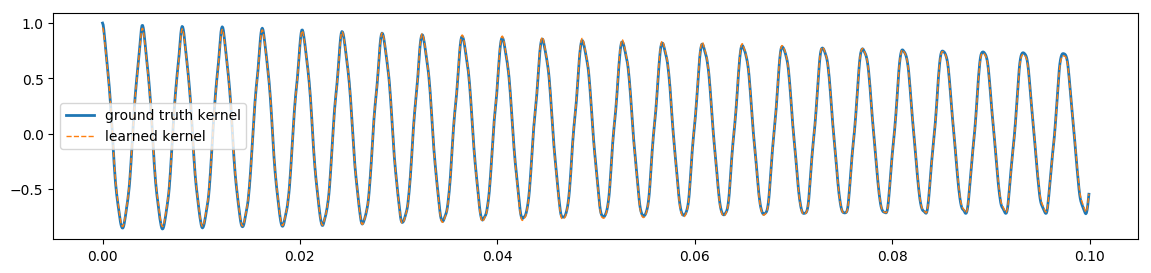

In [11]:
plt.plot(x, r, lw=2)
plt.plot(x, learned_k, '--', lw=1)
# plt.plot(x, kern_plot, '-', lw=1);
plt.legend(['ground truth kernel', 'learned kernel', 'learned kernel gpitch']);
# plt.xlim(0, 0.001), plt.ylim(0, 1);

In [12]:
# log_sd_r = np.log(np.abs(fftpack.fft(r.reshape(-1,))))
# log_sd_k = np.log(np.abs(fftpack.fft(kern_plot.reshape(-1,))))
# plt.plot(log_sd_r, lw=2)
# plt.plot(log_sd_k, '--', lw=2)
# plt.xlim(0, rsize/2)